

---

<center><h1>Assignment 4</h1></center>

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [21]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [22]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

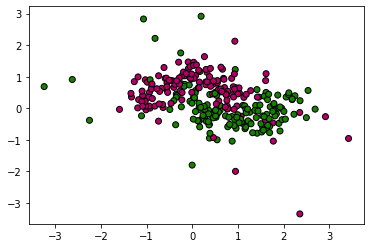

In [23]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

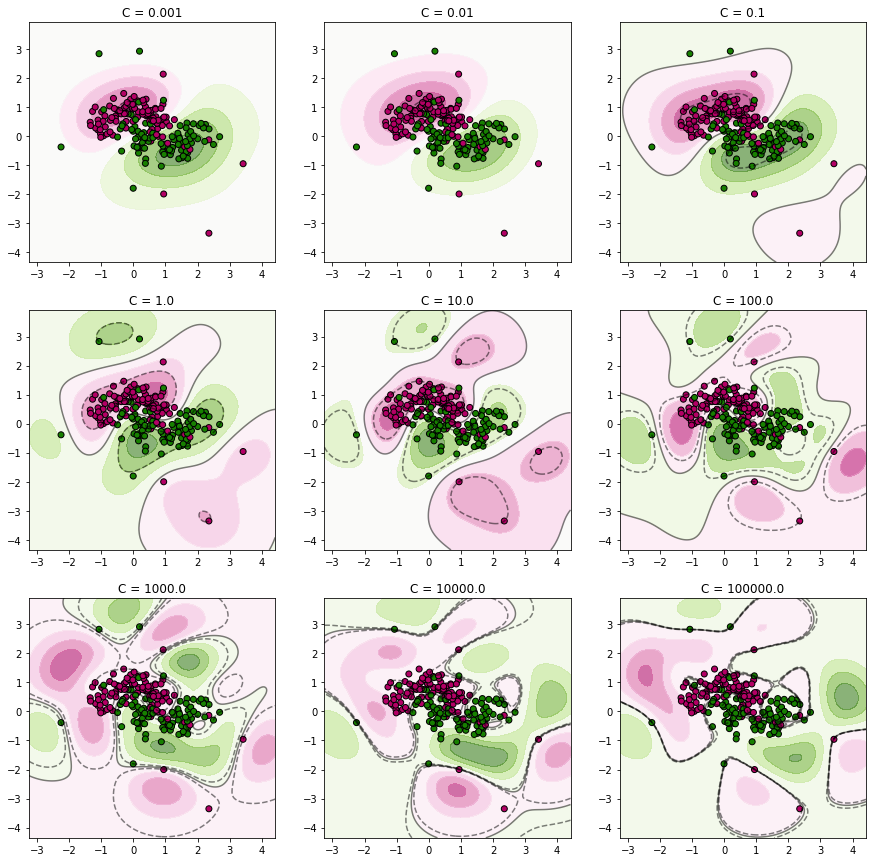

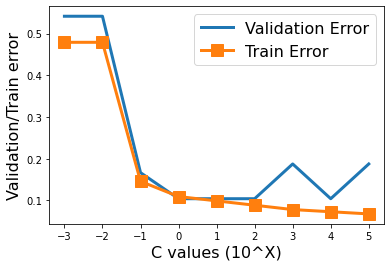

C best accuracy and values:  0.8958333333333334 [1.0, 10.0, 100.0, 10000.0]
Accuracy on the test set : 85.0


In [24]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()
prediction_val= dict()
prediction_train= dict()
prediction_test= dict()
accuracy=dict()

for C in C_values:
  #
  #
  # Insert your code here to learn SVM models
    
    models[C] = SVC(kernel = 'rbf', C=C, gamma='scale').fit(X_trn, y_trn)
    prediction_val[C]=models[C].predict(X_val)
    prediction_train[C]=models[C].predict(X_trn)
    prediction_test[C]=models[C].predict(X_tst)
    accuracy[C]=accuracy_score(y_val,prediction_val[C])
    valErr[C]=mean_squared_error(y_val,prediction_val[C])
    trnErr[C]=mean_squared_error(y_trn,prediction_train[C])
    

visualize(models, 'C', X_trn, y_trn)
plt2.figure() 
plt2.plot(list(C_range),list(valErr.values()),linewidth=3, markersize=12)
plt2.plot(list(C_range),list(trnErr.values()),marker='s', linewidth=3, markersize=12)
plt2.ylabel('Validation/Train error', fontsize=16)
plt2.legend(['Validation Error', 'Train Error'], fontsize=16)
plt2.xlabel('C values (10^X)',fontsize=16)
plt2.show()
 
max_accuracy=max(accuracy.values())
max_keys = [k for k, v in accuracy.items() if v == max_accuracy]
print("C best accuracy and values: ",max_accuracy,max_keys)

test_accuracy=dict()
for C in max_keys:
    test_accuracy[C]=accuracy_score(y_tst,prediction_test[C])
print("Accuracy on the test set :",max(test_accuracy.values())*100)

---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

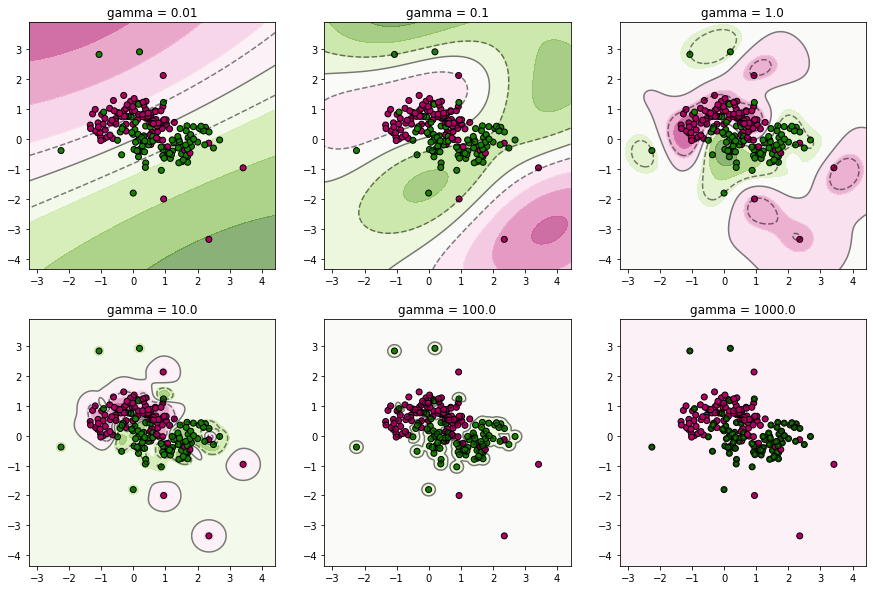

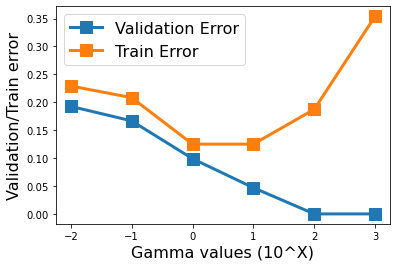

Gamma best accuracy and values:  87.5 [1.0, 10.0]
Best test accuracy on test set:  83.33333333333334


In [25]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()
prediction_val= dict()
prediction_train= dict()
prediction_test= dict()
accuracy=dict()

for G in gamma_values:
  #
  #
  # Insert your code here to learn SVM models
    models[G] = SVC(kernel = 'rbf', C=10, gamma=G).fit(X_trn, y_trn)
    prediction_val[G]=models[G].predict(X_val)
    prediction_train[G]=models[G].predict(X_trn)
    prediction_test[G]=models[G].predict(X_tst)
    accuracy[G]=accuracy_score(y_val,prediction_val[G])
    valErr[G]=mean_squared_error(y_val,prediction_val[G])
    trnErr[G]=mean_squared_error(y_trn,prediction_train[G])
  #
  
visualize(models, 'gamma', X_trn, y_trn)
plt2.figure() 
plt2.plot(list(gamma_range),list(trnErr.values()),marker='s', linewidth=3, markersize=12)
plt2.plot(list(gamma_range),list(valErr.values()),marker = 's', linewidth=3, markersize=12)

plt2.ylabel('Validation/Train error', fontsize=16)
plt2.legend(['Validation Error', 'Train Error'], fontsize=16)
plt2.xlabel('Gamma values (10^X)',fontsize=16)
plt2.show()

max_accuracy=max(accuracy.values())
max_keys = [k for k, v in accuracy.items() if v == max_accuracy]
print("Gamma best accuracy and values: ", max_accuracy* 100,max_keys)
test_accuracy=dict()
for G in max_keys:
    test_accuracy[G]=accuracy_score(y_tst,prediction_test[G])
print("Best test accuracy on test set: ",max(test_accuracy.values())*100)

---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [26]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
#
import numpy as np

data_trn = np.loadtxt(open("wdbc_trn.csv", mode = 'rb'), delimiter = ',')
X_trn= data_trn[:,1:]
y_trn= data_trn[:,0]

data_val = np.loadtxt(open("wdbc_val.csv", mode = 'rb'), delimiter = ',')
X_val= data_val[:,1:]
y_val= data_val[:,0]

data_tst = np.loadtxt(open("wdbc_tst.csv", mode = 'rb'), delimiter = ',')
X_tst= data_tst[:,1:]
y_tst= data_tst[:,0]

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [27]:
#
#
# Insert your code here to perform model selection
#
#

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_range = np.arange(-2.0, 4.0, 1.0)
C_values = np.power(10.0, C_range)

gamma_range = np.arange(-3.0, 2.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()

prediction_val= dict()
prediction_train= dict()
prediction_test= dict()
accuracy=dict()

for C in C_values:
    for G in gamma_values:
         models[C,G]= SVC(C=C, gamma=G, kernel = 'rbf').fit(X_trn, y_trn).fit(X_trn,y_trn)
         prediction_val[C,G]=models[C,G].predict(X_val)
         prediction_train[C,G]=models[C,G].predict(X_trn)
         prediction_test[C,G]=models[C,G].predict(X_tst)
         valErr[C,G]=mean_squared_error(y_val,prediction_val[C,G])
         trnErr[C,G]=mean_squared_error(y_trn,prediction_train[C,G])
         accuracy[C,G]=accuracy_score(y_val,prediction_val[C,G])
         print("For,Gamma = " , G , ", C = ", C , ",the Train Error = " , trnErr[C,G] ," & the Validation error =  " , valErr[C,G])
         print("----------------------------------------------------------------------------------------")
         
max_accuracy=max(accuracy.values())
max_keys = [k for k, v in accuracy.items() if v == max_accuracy]
print("C best and Gamma best accuracy and values: ", max_accuracy*100,max_keys)
test_accuracy=dict()
for C,G in max_keys:
    test_accuracy[C,G]=accuracy_score(y_tst,prediction_test[C,G])
print('Test Set Accuracy of SVM:',max(test_accuracy.values())*100) 

For,Gamma =  0.001 , C =  0.01 ,the Train Error =  1.4867256637168142  & the Validation error =   1.4956521739130435
----------------------------------------------------------------------------------------
For,Gamma =  0.01 , C =  0.01 ,the Train Error =  1.4867256637168142  & the Validation error =   1.4956521739130435
----------------------------------------------------------------------------------------
For,Gamma =  0.1 , C =  0.01 ,the Train Error =  1.4867256637168142  & the Validation error =   1.4956521739130435
----------------------------------------------------------------------------------------
For,Gamma =  1.0 , C =  0.01 ,the Train Error =  1.4867256637168142  & the Validation error =   1.4956521739130435
----------------------------------------------------------------------------------------
For,Gamma =  10.0 , C =  0.01 ,the Train Error =  1.4867256637168142  & the Validation error =   1.4956521739130435
-----------------------------------------------------------------

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

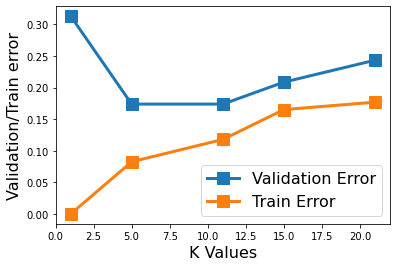

K Best Accuracy and Values:  95.65217391304348 [5, 11]
Test Set Accuracy of best KNN Model:  97.3913043478261


In [28]:
#
#
# Insert your code here to perform model selection
#
#

k_values= [1,5,11,15,21]
models = dict()
trnErr = dict()
valErr = dict()
prediction_val= dict()
prediction_train= dict()
prediction_test= dict()
accuracy=dict()

for K in k_values:
    models[K]= KNeighborsClassifier(n_neighbors=K)
    models[K].fit(X_trn,y_trn)
    prediction_val[K]=models[K].predict(X_val)
    prediction_train[K]=models[K].predict(X_trn)
    prediction_test[K]=models[K].predict(X_tst)
    accuracy[K]=accuracy_score(y_val,prediction_val[K])
    valErr[K]=mean_squared_error(y_val,prediction_val[K])
    trnErr[K]=mean_squared_error(y_trn,prediction_train[K])

plt.figure() 
plt.plot(list(valErr.keys()),list(valErr.values()),marker='s', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()),list(trnErr.values()),marker='s', linewidth=3, markersize=12)
plt.ylabel('Validation/Train error', fontsize=16)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)
plt.xlabel('K Values',fontsize=16)
plt.show()

max_accuracy=max(accuracy.values())
max_keys = [k for k, v in accuracy.items() if v == max_accuracy]
print("K Best Accuracy and Values: ", max_accuracy * 100,max_keys)
test_accuracy=dict()
for K in max_keys:
    test_accuracy[K]=accuracy_score(y_tst,prediction_test[K])
print("Test Set Accuracy of best KNN Model: ", max(test_accuracy.values())*100)

**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.